In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import layers, models, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Load Fasion MNIST dataset 
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# The pixel values normalization for the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [4]:
# Split the train dataset into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    training_images,
    training_labels,
    test_size=0.1,
    random_state=42,
    stratify=training_labels)    # keep class proportions (classification)

In [12]:
inputs = layers.Input(shape=(28, 28, 1))
conv_layer_one = layers.Conv2D(64, (3,3), activation='relu')(inputs)
mp2D_layer_one = layers.MaxPooling2D(2, 2)(conv_layer_one)
conv_layer_two = layers.Conv2D(64, (3,3), activation='relu')(mp2D_layer_one)
mp2D_layer_two = layers.MaxPooling2D(2,2)(conv_layer_two)

flatten = layers.Flatten()(mp2D_layer_two)
x = layers.Dense(128, activation="relu")(flatten)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,402 (982.04 KB)

 Trainable params: 251,402 (982.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

early_stop = EarlyStopping(
    monitor="val_loss",       # what to monitor
    patience=5,               # epochs to wait without improvement
    restore_best_weights=True)# roll back to best epoch

checkpoint = ModelCheckpoint(
    filepath="best_model.keras",
    monitor="val_loss",
    save_best_only=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=2)

Epoch 1/100
422/422 - 9s - 21ms/step - accuracy: 0.7872 - loss: 0.5847 - val_accuracy: 0.8600 - val_loss: 0.3765
Epoch 2/100
422/422 - 8s - 19ms/step - accuracy: 0.8652 - loss: 0.3696 - val_accuracy: 0.8878 - val_loss: 0.3210
Epoch 3/100
422/422 - 8s - 19ms/step - accuracy: 0.8848 - loss: 0.3159 - val_accuracy: 0.8937 - val_loss: 0.2895
Epoch 4/100
422/422 - 8s - 19ms/step - accuracy: 0.8942 - loss: 0.2858 - val_accuracy: 0.9018 - val_loss: 0.2646
Epoch 5/100
422/422 - 8s - 19ms/step - accuracy: 0.9048 - loss: 0.2557 - val_accuracy: 0.9058 - val_loss: 0.2552
Epoch 6/100
422/422 - 8s - 18ms/step - accuracy: 0.9128 - loss: 0.2362 - val_accuracy: 0.9082 - val_loss: 0.2491
Epoch 7/100
422/422 - 8s - 19ms/step - accuracy: 0.9190 - loss: 0.2185 - val_accuracy: 0.9113 - val_loss: 0.2419
Epoch 8/100
422/422 - 8s - 19ms/step - accuracy: 0.9253 - loss: 0.2024 - val_accuracy: 0.9160 - val_loss: 0.2306
Epoch 9/100
422/422 - 8s - 19ms/step - accuracy: 0.9318 - loss: 0.1852 - val_accuracy: 0.9153 - 

In [8]:
def plot_history(history):
    """
    Plots the training and validation loss and accuracy from a Keras history object.

    Args:
        history (dict): The history.history dictionary returned by model.fit().
    """

    # Determine which keys to use for loss and accuracy
    # Keras uses 'accuracy'/'val_accuracy' or 'acc'/'val_acc'
    if 'accuracy' in history:
        acc_key = 'accuracy'
        val_acc_key = 'val_accuracy'
    elif 'acc' in history:
        acc_key = 'acc'
        val_acc_key = 'val_acc'
    else:
        print("Could not find accuracy/acc keys in history.")
        return

    # Get the number of epochs
    epochs = range(1, len(history['loss']) + 1)
    
    # 1. Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 2. Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history[acc_key], 'b', label='Training Accuracy')
    plt.plot(epochs, history[val_acc_key], 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout() # Adjusts plot to prevent overlap
    plt.show()

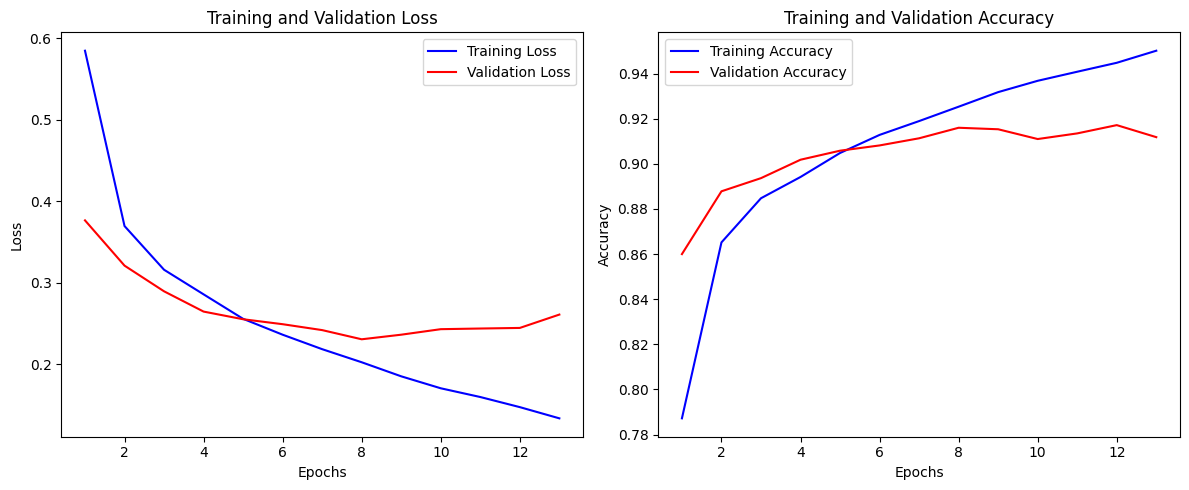

In [14]:
plot_history(history.history)

In [15]:
predicted_labels = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [16]:
accuracy = accuracy_score(test_labels, np.argmax(predicted_labels, axis=1))

In [17]:
print("Accuracy:", accuracy)

Accuracy: 0.9088
